In [1]:
import psycopg2
import psycopg2.extras
import numpy as np
import pandas as pd
import renders as rs
import seaborn as sns
import matplotlib.pyplot as plt # 3
from sklearn.cluster import KMeans # 4
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler  # For scaling dataset
%matplotlib inline

In [2]:
###################################################################################################################
###################### Este trabalho tem como objetivo realizar uma segmentação a partir dos ######################
###################### dados de notas de filmes disponibilizados. Os dados são referentes às ######################
###################### médias das notas de cada aluno para cada categoria de filme           ######################
###################################################################################################################

In [3]:
###################################################################################################################
############### Início das operações de conexão com o banco de dados e obtenção dos dados utilizados ##############
###################################################################################################################

In [4]:
# - Conexão com o banco de dados através do drives do postgres:
try:
    conn = psycopg2.connect("dbname='1802FDT' user='1802FDT' host='200.134.10.32' password='398643'")
except:
    print "I am unable to connect to the database."

cur = conn.cursor()

In [5]:
# - Leitura dos dados de categorias de filmes e alunos:
data = pd.read_sql("SELECT * from categoria", conn)
categorias = [x for x in data['nome']]

data = pd.read_sql("SELECT * from pessoa", conn)
usuarios = [x for x in data['login']]

In [6]:
# - Criação de um dataframe recuperando a média da nota de cada categoria para cada aluno:
movieDataFrame = pd.DataFrame(index=usuarios, columns=categorias)
for x in usuarios:
    for y in categorias:
        value = pd.read_sql(("SELECT AVG(nota) from avalia_filme avf "
                                            "JOIN filme_full ff ON ff.id_filme = avf.id_filme "
                                            "WHERE avf.login_pessoa  = %(login)s "
                                            "AND ff.categoria = %(cat)s"), conn, params={"login":x, "cat": y})
        movieDataFrame[y][x] = value['avg'][0] if value['avg'][0] != None else 0

In [7]:
# - Tratamento dos dados para deixar todos no mesmo tipo:
for col in  movieDataFrame.columns[0:10]:
    movieDataFrame[col] = movieDataFrame[col].astype(float)

In [8]:
movieDataFrame

Horror     Crime  Sci-Fi  Animation     Drama  Comedy  \
DI1802alexandrematias      0.0  5.000000     0.0   0.000000  5.000000     5.0   
DI1802annabucharles        4.0  4.000000     0.0   5.000000  0.000000     4.0   
DI1802cassiomorales        0.0  3.333333     0.0   0.000000  4.000000     0.0   
DI1802damonoliniski        0.0  0.000000     0.0   5.000000  4.000000     0.0   
DI1802danielvieira         0.0  5.000000     0.0   0.000000  4.500000     0.0   
DI1802ericwada             0.0  0.000000     0.0   0.000000  0.000000     0.0   
DI1802evertonoliveira      5.0  5.000000     5.0   0.000000  5.000000     0.0   
DI1802francoisrueckert     0.0  0.000000     0.0   0.000000  0.000000     0.0   
DI1802gabrielguerrero      0.0  5.000000     0.0   5.000000  4.000000     0.0   
DI1802giulianasilva        0.0  5.000000     0.0   4.000000  0.000000     0.0   
DI1802henriqueoliveira     0.0  5.000000     0.0   4.500000  4.000000     0.0   
DI1802heronfernandez       0.0  0.000000     0.0   4.500000  4.000000     0.0   
DI1802joaoneto             0.0  0.000000     0.0   0.000000  0.000000     0.0   
DI1802joaoborges           0.0  4.500000     0.0   4.000000  3.000000     0.0   
DI1802joaosilva            0.0  0.000000     0.0   5.000000  0.000000     0.0   
DI1802joaojorge            0.0  4.333333     0.0   5.000000  5.000000     0.0   
DI1802julianacorrea        0.0  0.000000     0.0   0.000000  0.000000     0.0   
DI1802juliopenha           0.0  4.500000     0.0   0.000000  3.000000     0.0   
DI1802leonardoreis         0.0  5.000000     0.0   5.000000  5.000000     0.0   
DI1802lincolnbatista       0.0  0.000000     0.0   3.000000  0.000000     0.0   
DI1802lucasrech            0.0  0.000000     0.0   0.000000  0.000000     0.0   
DI1802lucasnolasco         0.0  0.000000     0.0   0.000000  4.500000     0.0   
DI1802lucasvaliati         0.0  0.000000     0.0   0.000000  0.000000     0.0   
DI1802lucasribeiro         0.0  4.200000     0.0   0.000000  4.000000     0.0   
DI1802lucastakahashi       0.0  0.000000     0.0   3.250000  3.000000     0.0   
DI1802marcostholken        0.0  0.000000     0.0   4.500000  5.000000     0.0   
DI1802mateusgomes          0.0  0.000000     0.0   0.000000  0.000000     0.0   
DI1802matheuscosta         0.0  0.000000     2.0   4.000000  0.000000     0.0   
matheusgoncalves           0.0  0.000000     0.0   0.000000  0.000000     0.0   
DI1802matheusoliveira      0.0  0.000000     0.0   4.400000  5.000000     0.0   
DI1802nicolebotine         0.0  5.000000     0.0   0.000000  5.000000     5.0   
DI1802nortonjunior         0.0  5.000000     0.0   0.000000  0.000000     0.0   
DI1802paularodrigues       0.0  0.000000     0.0   3.000000  4.500000     0.0   
DI1802pedrosplendore       3.0  0.000000     0.0   0.000000  0.000000     0.0   
DI1802rafaelcarvalho       0.0  0.000000     0.0   0.000000  0.000000     0.0   
DI1802raphaelfelix         0.0  5.000000     0.0   0.000000  5.000000     0.0   
DI1802renatafarago         0.0  1.000000     0.0   5.000000  3.000000     3.0   
DI1802steventunnicliff     0.0  0.000000     0.0   5.000000  4.000000     0.0   
DI1802tasipasin            0.0  0.000000     0.0   3.500000  0.000000     3.0   
DI1802tiagoplakitca        0.0  5.000000     0.0   4.000000  5.000000     0.0   
DI1802vickiearanha         0.0  0.000000     0.0   0.000000  0.000000     0.0   
DI1802victormenuzzo        0.0  0.000000     0.0   3.333333  4.666667     0.0   
DI1802viniciusbernert      0.0  0.000000     0.0   5.000000  5.000000     0.0   
DI1802vivianebonfim        0.0  4.500000     0.0   0.000000  3.333333     0.0   
DI1802wagneragostinho      0.0  0.000000     4.0   2.500000  0.000000     0.0   

                        Biography  Adventure    Action  Mystery  
DI1802alexandrematias         0.0        5.0  5.000000      0.0  
DI1802annabucharles           5.0        5.0  4.000000      0.0  
DI1802cassiomorales           0.0        0.0  4.000000      0.0  
DI1802damonoliniski           0.0

In [9]:
###################################################################################################################
################# Fim das operações de conexão com o banco de dados e obtenção dos dados utilizados ###############
###################################################################################################################

In [10]:
###################################################################################################################
#################################### Início da análise dos dados ##################################################
###################################################################################################################

In [11]:
# - Criando uma visualização do grau de correlação entre as categorias de filmes:
data = movieDataFrame[categorias]
cor = data.corr() # - Calcula a correlação entre as categorias

sns.heatmap(cor, square = True) # - Plota o heatmap exibindo as categorias e suas correlações

In [12]:
# Observando o heatmap acima e o dataset podemos concluir algumas coisas:
# 1 - A maioria das categorias de filmes não possuem um grau de correlação alto entre si, portanto
# fica difícil definir dimensões significativas.
# 2 - Grau de correlação baixo causa um número grande de dimensões com relevância muito baixa e características
# muito particulares.
# 3 - Categorias com grau de correlação um pouco mais altos porém pouca quantidade de dados também não são
# muito representativas no resultado final .
# Sci-Fi e Horror tiveram ambas apenas 3 avaliações mas tem aproximadamente 0,6 de correlação
# culpa do DI1802evertonoliveira
# 4 - Não ter grau de correlação demonstra que não existe um padrão nos dados de forma que eles possam ser 
# agrupados em grupos bem definidos

In [13]:
##################################################################################################################
################### O k-means é uma técnica de clusterização que visa agrupar os dados em volta ##################
################### de suas centróides que por sua vez possuem a média dos valores do cluster.  ##################
##################################################################################################################

In [14]:
##################################################################################################################
############################################# Aplicando o algoritmo ##############################################
##################################################################################################################

In [15]:
# - Realizando a clusterização:
def doKmeans(X, nclust):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(data, 3) # Número de clusters = 3
kmeans = pd.DataFrame(clust_labels)
data.insert((data.shape[1]),'kmeans',kmeans)

In [16]:
##################################################################################################################
####################################### Analisando e exibindo resultado ##########################################
##################################################################################################################

In [17]:
###################################################################################################################
############### Devido a falta de dados consistentes a plotagem de um gráfico com todos os clusters ###############
############### utilizando uma redução de dimensão não seria viável devido a falta de significância ###############
############### dos dados, portanto a análise será realizada comparando categorias mais significativas ############
###################################################################################################################

In [18]:
# - Plotando os resultados:
# Alta correlação + Bom dataset
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['Action'],data['Adventure'], c=kmeans[0],s=50)
ax.set_title('1')
ax.set_xlabel('Action')
ax.set_ylabel('Adventure')
plt.colorbar(scatter)

In [19]:
# Conclusões 
# Correlação: 0,6
# Quantidade de dados: em torno de 23 cada
# Com uma quantidade de dados razoável e um bom grau de correlação já é possível perceber que os dados começam
# um processo de migração para seus centros de área e começam a criar pequenos grupos mas ainda tem grupos 
# um pouco misturados nos pontos onde dimensões se encontram

In [20]:
# - Plotando os resultados:
# Baixa correlação + Bom dataset
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['Crime'],data['Animation'], c=kmeans[0],s=50)
ax.set_title('2')
ax.set_xlabel('Crime')
ax.set_ylabel('Animation')
plt.colorbar(scatter)

In [21]:
# Conclusões:
# Correlação: 0,0
# Quantidade de dados: em torno de 18 cada
# Com uma quantidade de dados razoável e um bom grau de correlação baixo, é possível observar que os grupos foram
# melhor definidos porém cada um no seu canto.
# Isso se deve ao fato de que os clusters representam cada um sua característica, porém como o grau de correlação 
# é baixo, eles não possuem influência entre si, ou seja, seguem distribuições totalmente diferentes

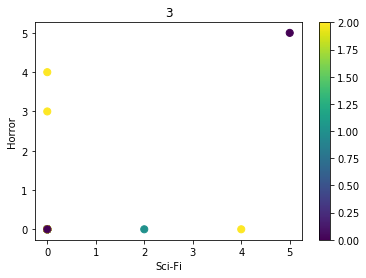

In [22]:
# - Plotando os resultados:
# Alta correlação + Dataset ruim
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['Sci-Fi'],data['Horror'], c=kmeans[0],s=50)
ax.set_title('3')
ax.set_xlabel('Sci-Fi')
ax.set_ylabel('Horror')
plt.colorbar(scatter)

In [23]:
# Conclusões:
# Correlação: 0,7
# Quantidade de dados: exatamente 3 cada
# Com uma alta taxa de correlação porém sem dados, não é possível concluir muita coisa além de que os clusters 
# acima não tem muita significância.
# A análise que podemos fazem em cima disso é a de que para tirar algum tipo de conclusão é necessária uma 
# quantidade mínima de dados

In [24]:
# Considerações finais:
# Como podemos ver uma segmentação utilizando os dados disponibilizados não é uma técnica muito eficiente devido
# a fatores como um dataset reduzido e pouco correlacionado.
# Porém a partir da "falha" na segmentação, podemos também concluir que os dados não seguem nenhum padrão
# significativo a ponto de criar e definir bem as características de cada grupo.